In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
import os 
import seaborn as sns #for styling the plots
import warnings
import urllib.request
%matplotlib inline

In [3]:
from scipy import stats
import geopandas as gpd
import urllib
import sys
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cm as cm
import sklearn

## If API

In [4]:
pip install sodapy

  Using cached sodapy-2.1.0-py2.py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sodapy import Socrata

In [36]:
data_url='data.cityofnewyork.us'    # The Host Name for the API endpoint (the https:// part will be added automatically)
data_set='h9gi-nx95'    # The data set at the API endpoint (311 data in this case)
app_token='nEFd0apIUuyjJVKJgO4hHMVOK'   # The app token created in the prior steps
client = Socrata(data_url,app_token)      # Create the client to point to the API endpoint
# Set the timeout to 60 seconds    
client.timeout = 600
# Retrieve the first 2000 results returned as JSON object from the API
# The SoDaPy library converts this JSON object to a Python list of dictionaries
results = client.get(data_set, limit=1878124)
# Convert the list of dictionaries to a Pandas data frame
df = pd.DataFrame.from_records(results)

In [37]:
# Save the data frame to a CSV file
df.to_csv("Motor_Vehicle_Collisions_Crashes.csv")

In [38]:
df.shape

(1878124, 29)

In [39]:
df.columns

Index(['crash_date', 'crash_time', 'on_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough',
       'zip_code', 'latitude', 'longitude', 'location', 'cross_street_name',
       'off_street_name', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'vehicle_type_code_3',
       'vehicle_type_code_4', 'contributing_factor_vehicle_5',
       'vehicle_type_code_5'],
      dtype='object')

## Not API

In [4]:
df1=pd.read_csv('Motor_Vehicle_Collisions_Crashes.csv')

In [5]:
df1 = df1.drop(columns=['Unnamed: 0'])

In [6]:
df1.shape

(1878124, 29)

In [7]:
df1.drop_duplicates(subset=['collision_id'],inplace=True)
df1.dropna(subset=['collision_id', 'crash_date', 'crash_time'],inplace=True)

In [8]:
df1['crash_date'] = pd.to_datetime(df1['crash_date'])
df1['crash_time'] = pd.to_datetime(df1['crash_time'])

In [9]:
df1['Date'] = df1['crash_date'].dt.date
df1['Month'] = df1['crash_date'].dt.month
df1['Year'] = df1['crash_date'].dt.year
df1['DOW'] = df1['crash_date'].dt.dayofweek
df1['Hour'] = df1['crash_time'].dt.hour

In [10]:
df1['day'] = df1['crash_date'].dt.dayofyear

In [11]:
df1.head()

,crash_date,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,...,vehicle_type_code_3,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5,Date,Month,Year,DOW,Hour,day
0,2021-04-14,2022-04-25 05:32:00,BRONX WHITESTONE BRIDGE,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2021-04-14,4,2021,2,5,104
1,2021-04-13,2022-04-25 21:35:00,NaN,1.0,0.0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,2021-04-13,4,2021,1,21,103
2,2021-04-15,2022-04-25 16:15:00,HUTCHINSON RIVER PARKWAY,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2021-04-15,4,2021,3,16,105
3,2021-04-13,2022-04-25 16:00:00,VANDERVORT AVENUE,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2021-04-13,4,2021,1,16,103
4,2021-04-12,2022-04-25 08:25:00,EDSON AVENUE,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2021-04-12,4,2021,0,8,102


In [12]:
df1['number_of_persons_injured'] = df1['number_of_persons_injured'].fillna(0)
df1['number_of_persons_killed'] = df1['number_of_persons_killed'].fillna(0)
df1['number_of_pedestrians_injured'] = df1['number_of_pedestrians_injured'].fillna(0)
df1['number_of_pedestrians_killed'] = df1['number_of_pedestrians_killed'].fillna(0)
df1['number_of_cyclist_injured'] = df1['number_of_cyclist_injured'].fillna(0)
df1['number_of_cyclist_killed'] = df1['number_of_cyclist_killed'].fillna(0)
df1['number_of_motorist_injured'] = df1['number_of_motorist_injured'].fillna(0)
df1['number_of_motorist_killed'] = df1['number_of_motorist_killed'].fillna(0)

### 把无zipcode信息row也删掉的数据集

In [13]:
df_drop_empty_zipcode = df1.copy()

In [14]:
df_drop_empty_zipcode.dropna(subset=['zip_code'],inplace=True)

In [15]:
df_drop_empty_zipcode.shape

(1296608, 35)

### 筛年份

In [16]:
df1_2018_2020 = df1.loc[df1['Year'].isin([2018,2019,2020])]

In [17]:
df1_2018_2020.shape

(555948, 35)

In [18]:
df_drop_empty_zipcode_2018_2020 = df_drop_empty_zipcode.loc[df1['Year'].isin([2018,2019,2020])]

In [19]:
df_drop_empty_zipcode_2018_2020.shape

(359838, 35)

### Time Distribution (collision number)

#### hourly

In [20]:
df1_Hourly = df1_2018_2020.groupby(['Hour']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Hourly = df1_Hourly.sort_values(by='Hour')

df1_Hourly['persons_injured_or_killed'] = df1_Hourly['number_of_persons_injured'] + df1_Hourly['number_of_persons_killed']
df1_Hourly['injured_or_killed_rate'] = df1_Hourly['persons_injured_or_killed'] / df1_Hourly['collision_count']
df1_Hourly['killed_rate'] = df1_Hourly['number_of_persons_killed'] / df1_Hourly['collision_count']
df1_Hourly.set_index('Hour',inplace = True)
df1_Hourly

,collision_count,number_of_persons_injured,number_of_persons_killed,persons_injured_or_killed,injured_or_killed_rate,killed_rate
Hour,,,,,,
0,20133,6990.0,46.0,7036.0,0.349476,0.002285
1,9216,3300.0,31.0,3331.0,0.361437,0.003364
2,6833,2597.0,17.0,2614.0,0.382555,0.002488
3,6109,2363.0,36.0,2399.0,0.392699,0.005893
4,6786,2542.0,38.0,2580.0,0.380195,0.005600
5,7758,2652.0,32.0,2684.0,0.345965,0.004125
6,13021,3943.0,25.0,3968.0,0.304738,0.001920
7,18262,5199.0,28.0,5227.0,0.286223,0.001533
8,30272,7646.0,22.0,7668.0,0.253303,0.000727


<AxesSubplot:xlabel='Hour'>

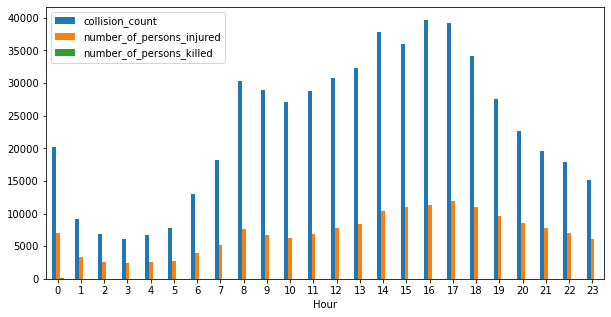

In [21]:
plt.rcParams["figure.figsize"] = (10,5)
df1_Hourly[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=0)

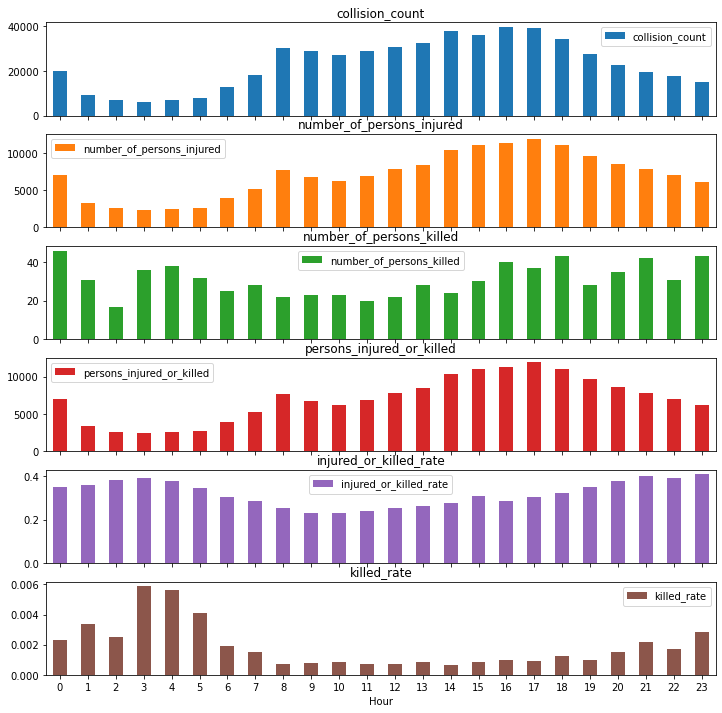

In [22]:
plt.rcParams["figure.figsize"] = (12,12)
axes =df1_Hourly.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)

#### monthly

In [23]:
df1_Monthly = df1_2018_2020.groupby(['Month']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Monthly = df1_Monthly.sort_values(by='Month')

df1_Monthly['persons_injured_or_killed'] = df1_Monthly['number_of_persons_injured'] + df1_Monthly['number_of_persons_killed']
df1_Monthly['injured_or_killed_rate'] = df1_Monthly['persons_injured_or_killed'] / df1_Monthly['collision_count']
df1_Monthly['killed_rate'] = df1_Monthly['number_of_persons_killed'] / df1_Monthly['collision_count']
df1_Monthly.set_index('Month',inplace = True)
df1_Monthly

,collision_count,number_of_persons_injured,number_of_persons_killed,persons_injured_or_killed,injured_or_killed_rate,killed_rate
Month,,,,,,
1,49417,13118.0,54.0,13172.0,0.266548,0.001093
2,45759,12265.0,51.0,12316.0,0.269149,0.001115
3,48110,12552.0,43.0,12595.0,0.261796,0.000894
4,39151,10799.0,51.0,10850.0,0.277132,0.001303
5,46594,13947.0,48.0,13995.0,0.300361,0.001030
6,47953,15172.0,76.0,15248.0,0.317978,0.001585
7,47404,15502.0,61.0,15563.0,0.328306,0.001287
8,46677,15782.0,62.0,15844.0,0.339439,0.001328
9,46387,15573.0,91.0,15664.0,0.337681,0.001962


<AxesSubplot:xlabel='Month'>

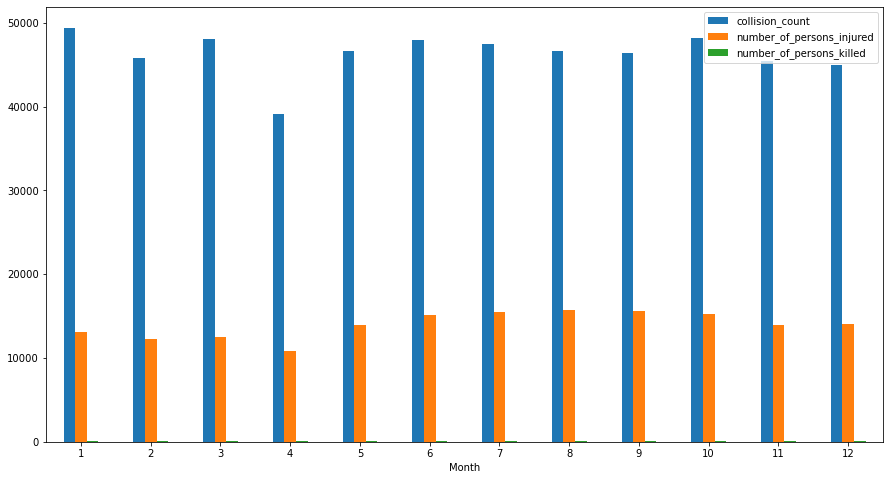

In [24]:
plt.rcParams["figure.figsize"] = (15,8)
df1_Monthly[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=0)

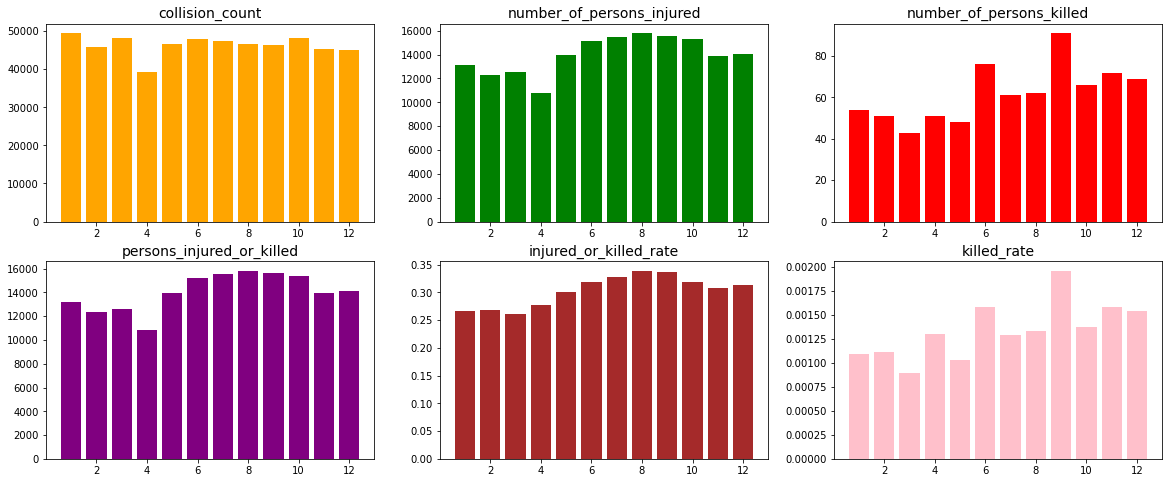

In [25]:
plt.figure(figsize = (20,8))
c = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']
for M in range(1,7):
    plt.subplot(2,3,M)
    plt.bar(df1_Monthly.index, df1_Monthly.iloc[:,M-1],color = c[M])
    plt.title(df1_Monthly.columns[M-1], fontsize = 14)

#### weekly

In [26]:
df1_Weekly = df1_2018_2020.groupby(['DOW']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Weekly = df1_Weekly.sort_values(by='DOW')

df1_Weekly['persons_injured_or_killed'] = df1_Weekly['number_of_persons_injured'] + df1_Weekly['number_of_persons_killed']
df1_Weekly['injured_or_killed_rate'] = df1_Weekly['persons_injured_or_killed'] / df1_Weekly['collision_count']
df1_Weekly['killed_rate'] = df1_Weekly['number_of_persons_killed'] / df1_Weekly['collision_count']
df1_Weekly.set_index('DOW',inplace = True)
df1_Weekly

,collision_count,number_of_persons_injured,number_of_persons_killed,persons_injured_or_killed,injured_or_killed_rate,killed_rate
DOW,,,,,,
0,79914,23543.0,116.0,23659.0,0.296056,0.001452
1,82483,24129.0,106.0,24235.0,0.293818,0.001285
2,81105,23409.0,82.0,23491.0,0.289637,0.001011
3,84092,24243.0,98.0,24341.0,0.289457,0.001165
4,88756,25678.0,90.0,25768.0,0.290324,0.001014
5,74467,24459.0,140.0,24599.0,0.330334,0.001880
6,65131,22474.0,112.0,22586.0,0.346778,0.001720


<AxesSubplot:xlabel='DOW'>

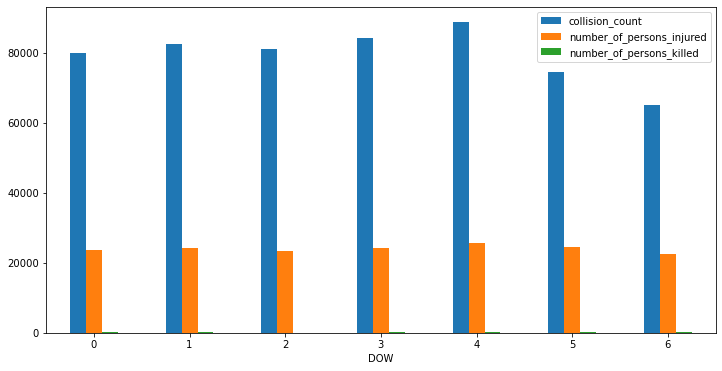

In [27]:
plt.rcParams["figure.figsize"] = (12,6)
df1_Weekly[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=0)

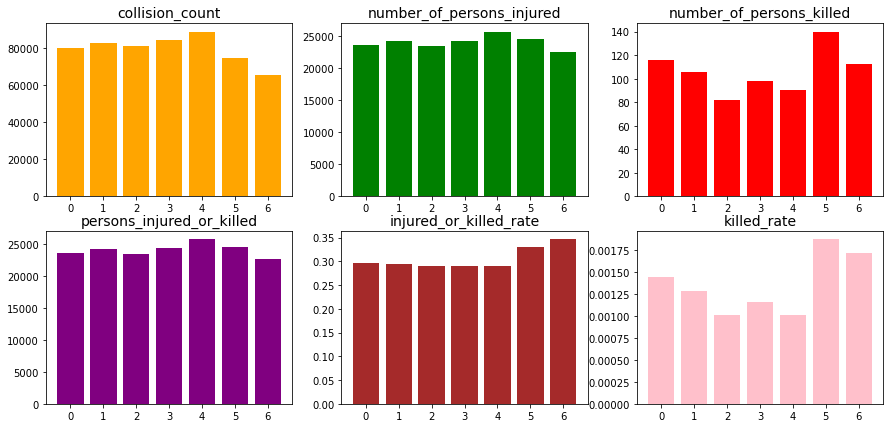

In [28]:
#plt.rcParams["figure.figsize"] = (8,15)
plt.figure(figsize = (15,7))
for M in range(1,7):
    plt.subplot(2,3,M)
    plt.bar(df1_Weekly.index, df1_Weekly.iloc[:,M-1],color = c[M])
    plt.title(df1_Weekly.columns[M-1], fontsize = 14)
#axes =df1_Weekly.plot.bar(rot=0, subplots=True)
#axes[1].legend(loc=2)

#### yearly

In [29]:
df1_Yearly = df1.groupby(['Year']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Yearly = df1_Yearly.sort_values(by='Year')

df1_Yearly['persons_injured_or_killed'] = df1_Yearly['number_of_persons_injured'] + df1_Yearly['number_of_persons_killed']
df1_Yearly['injured_or_killed_rate'] = df1_Yearly['persons_injured_or_killed'] / df1_Yearly['collision_count']
df1_Yearly['killed_rate'] = df1_Yearly['number_of_persons_killed'] / df1_Yearly['collision_count']
df1_Yearly.set_index('Year',inplace = True)
df1_Yearly

,collision_count,number_of_persons_injured,number_of_persons_killed,persons_injured_or_killed,injured_or_killed_rate,killed_rate
Year,,,,,,
2012,100545,27453.0,137.0,27590.0,0.274404,0.001363
2013,203734,55124.0,297.0,55421.0,0.272026,0.001458
2014,206033,51223.0,262.0,51485.0,0.249887,0.001272
2015,217694,51358.0,243.0,51601.0,0.237035,0.001116
2016,229831,60317.0,246.0,60563.0,0.263511,0.001070
2017,231007,60656.0,256.0,60912.0,0.263680,0.001108
2018,231563,61941.0,231.0,62172.0,0.268488,0.000998
2019,211485,61389.0,244.0,61633.0,0.291430,0.001154
2020,112900,44605.0,269.0,44874.0,0.397467,0.002383


<AxesSubplot:xlabel='Year'>

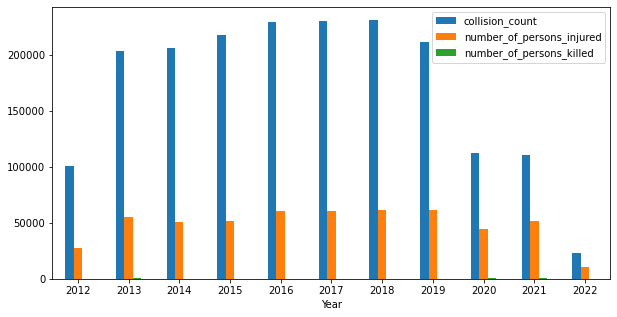

In [30]:
plt.rcParams["figure.figsize"] = (10,5)
df1_Yearly[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=0)

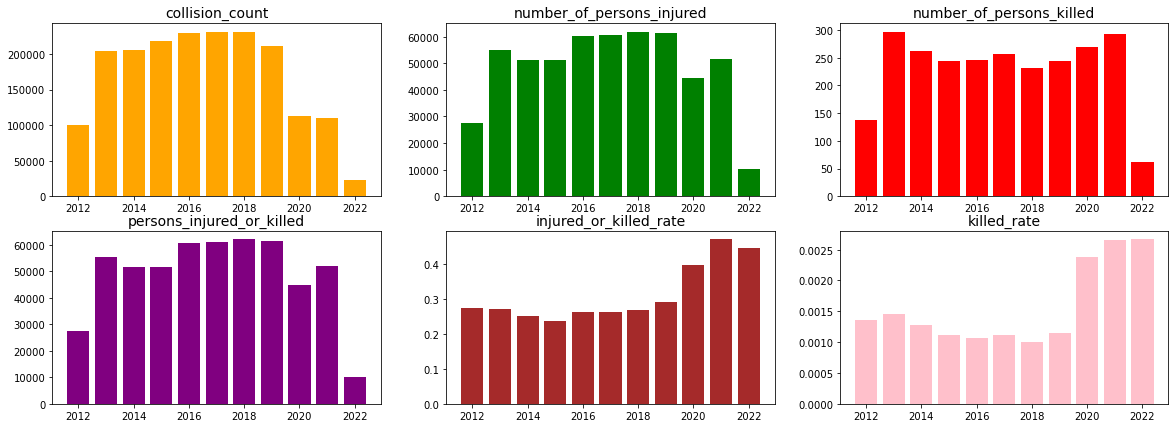

In [31]:
plt.figure(figsize = (20,7))
for M in range(1,7):
    plt.subplot(2,3,M)
    plt.bar(df1_Yearly.index, df1_Yearly.iloc[:,M-1],color = c[M])
    plt.title(df1_Yearly.columns[M-1], fontsize = 14)

#### daily

In [32]:
df1_Daily = df1_2018_2020.groupby(['day']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Daily = df1_Daily.sort_values(by='day')

df1_Daily['persons_injured_or_killed'] = df1_Daily['number_of_persons_injured'] + df1_Daily['number_of_persons_killed']
df1_Daily['injured_or_killed_rate'] = df1_Daily['persons_injured_or_killed'] / df1_Daily['collision_count']
df1_Daily['killed_rate'] = df1_Daily['number_of_persons_killed'] / df1_Daily['collision_count']
df1_Daily.set_index('day',inplace = True)
df1_Daily

,collision_count,number_of_persons_injured,number_of_persons_killed,persons_injured_or_killed,injured_or_killed_rate,killed_rate
day,,,,,,
1,1229,385.0,2.0,387.0,0.314890,0.001627
2,1569,422.0,1.0,423.0,0.269598,0.000637
3,1605,409.0,1.0,410.0,0.255452,0.000623
4,1415,363.0,2.0,365.0,0.257951,0.001413
5,1446,344.0,1.0,345.0,0.238589,0.000692
...,...,...,...,...,...,...
362,1220,384.0,2.0,386.0,0.316393,0.001639
363,1100,412.0,1.0,413.0,0.375455,0.000909
364,1166,376.0,0.0,376.0,0.322470,0.000000


<AxesSubplot:xlabel='day'>

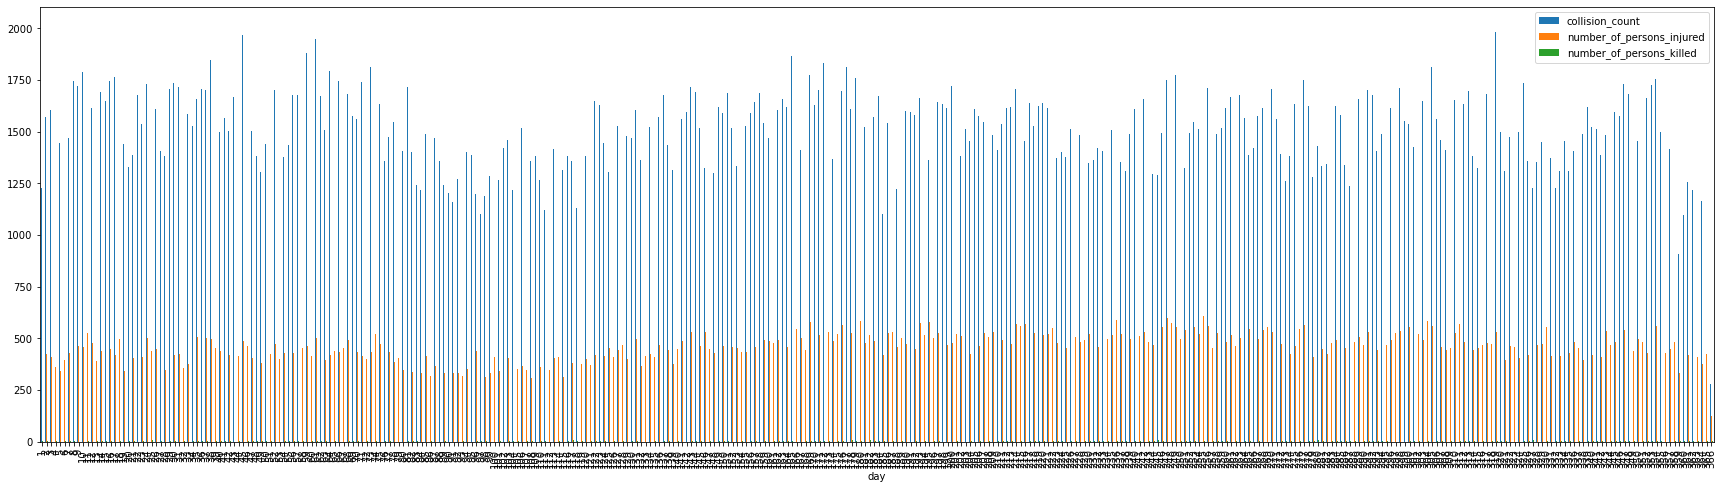

In [33]:
plt.rcParams["figure.figsize"] = (30,8)
df1_Daily[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=90)

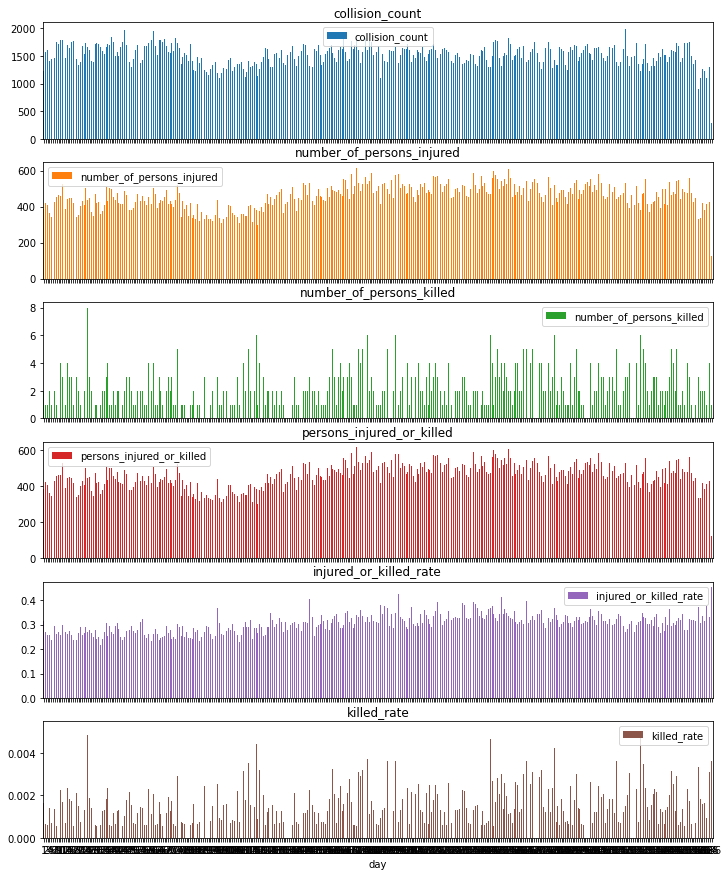

In [34]:
plt.rcParams["figure.figsize"] = (12,15)
axes =df1_Daily.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)

### Reason Analysis

In [35]:
Reasons_1 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_1.value_counts())
Reasons_2 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_2.value_counts())
Reasons_3 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_3.value_counts())
Reasons_4 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_4.value_counts())
Reasons_5 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_5.value_counts())

In [36]:
a = pd.merge(Reasons_1,Reasons_2,how = 'outer',left_index=True, right_index=True)
b = pd.merge(a,Reasons_3,how = 'outer',left_index=True, right_index=True)
c = pd.merge(b,Reasons_4,how = 'outer',left_index=True, right_index=True)
d = pd.merge(c,Reasons_5,how = 'outer',left_index=True, right_index=True)

In [37]:
reason_table = d.fillna(0)
reason_table['total_reason_count'] = reason_table.sum(axis = 1)
reason_table = reason_table.sort_values(by=['total_reason_count'],ascending = False)

In [38]:
new_reason_table = reason_table[reason_table.total_reason_count>3000]
others = reason_table[reason_table.total_reason_count<3000].sum()
others.name = 'Other Reasons'
new_reason_table = new_reason_table.append(others,ignore_index = False)
new_reason_table = new_reason_table.drop(index=('Unspecified'))

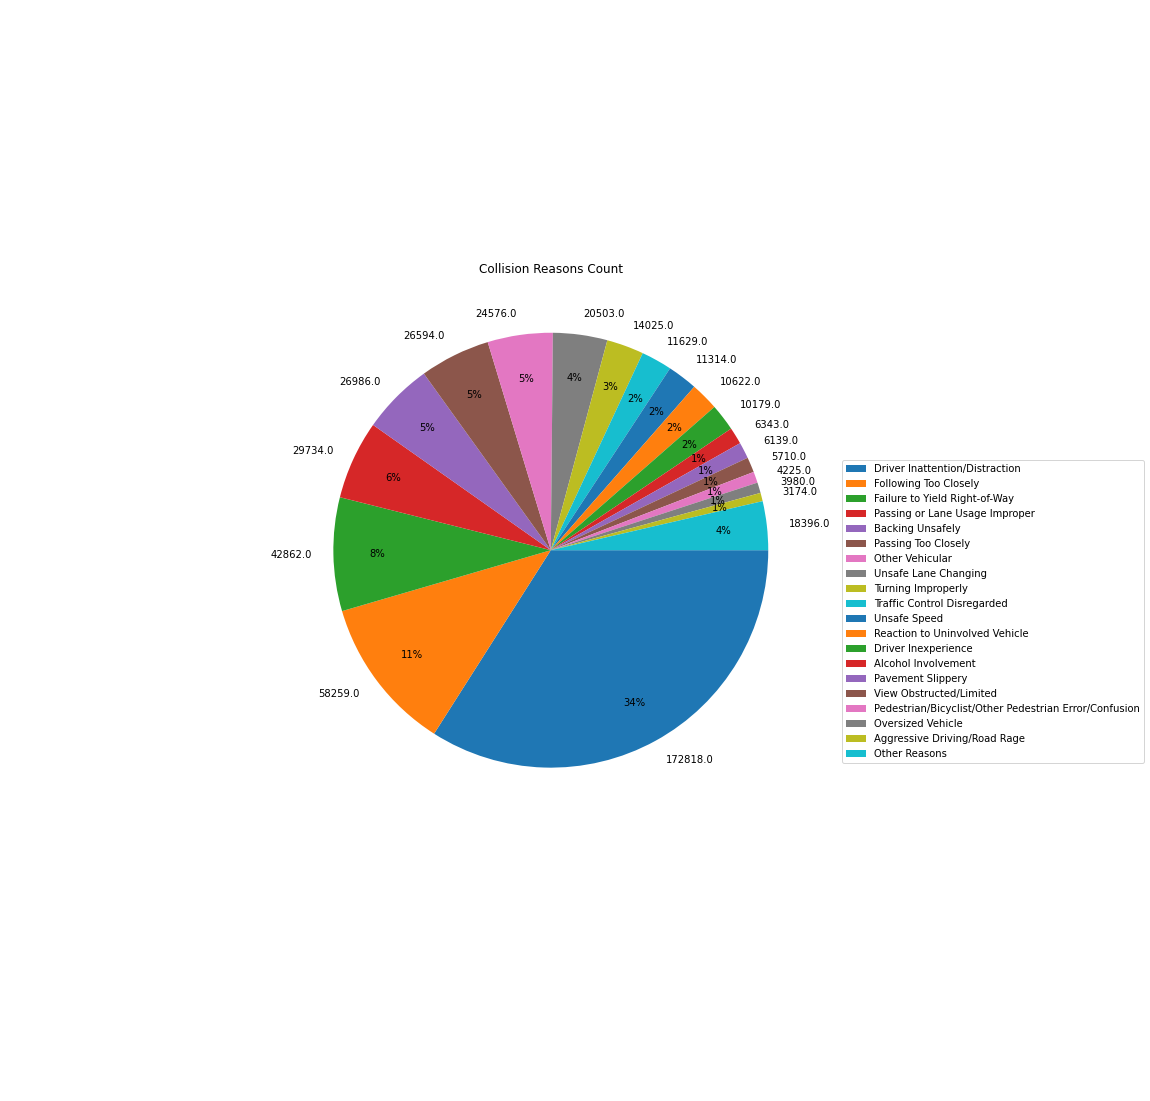

In [39]:
#new_reason_table['total_reason_count'].plot.pie(counterclock=False)
plt.rcParams["figure.figsize"] = (20,20)
plt.pie(new_reason_table.total_reason_count,radius = 0.5, counterclock=False,autopct='%1.0f%%',pctdistance=0.8, labels=new_reason_table.total_reason_count,labeldistance=1.1)
plt.title('Collision Reasons Count',y=0.75)
plt.legend(new_reason_table.index,loc = 'lower right', bbox_to_anchor=(1.05,0.3))
plt.show()

In [40]:
reason_table[reason_table.total_reason_count<3000]['total_reason_count']

Brakes Defective                               2152.0
Passenger Distraction                          1948.0
Fell Asleep                                    1713.0
Outside Car Distraction                        1370.0
Obstruction/Debris                             1345.0
Glare                                          1146.0
Steering Failure                                863.0
Failure to Keep Right                           855.0
Tire Failure/Inadequate                         771.0
Pavement Defective                              732.0
Illnes                                          661.0
Lost Consciousness                              616.0
Fatigued/Drowsy                                 608.0
Animals Action                                  543.0
Driverless/Runaway Vehicle                      522.0
Lane Marking Improper/Inadequate                464.0
Drugs (illegal)                                 364.0
Traffic Control Device Improper/Non-Working     349.0
Accelerator Defective       

#### Vehicle Type Analysis

In [41]:
Vehicle_1 = pd.DataFrame(df1_2018_2020.vehicle_type_code1.value_counts())
Vehicle_2 = pd.DataFrame(df1_2018_2020.vehicle_type_code2.value_counts())
Vehicle_3 = pd.DataFrame(df1_2018_2020.vehicle_type_code_3.value_counts())
Vehicle_4 = pd.DataFrame(df1_2018_2020.vehicle_type_code_4.value_counts())
Vehicle_5 = pd.DataFrame(df1_2018_2020.vehicle_type_code_5.value_counts())

In [42]:
av = pd.merge(Vehicle_1,Vehicle_2,how = 'outer',left_index=True, right_index=True)
bv = pd.merge(av,Vehicle_3,how = 'outer',left_index=True, right_index=True)
cv = pd.merge(bv,Vehicle_4,how = 'outer',left_index=True, right_index=True)
dv = pd.merge(cv,Vehicle_5,how = 'outer',left_index=True, right_index=True)

In [43]:
vehicle_table = dv.fillna(0)
vehicle_table['total_vehicle_count'] = vehicle_table.sum(axis = 1)
vehicle_table = vehicle_table.sort_values(by=['total_vehicle_count'],ascending = False)

In [44]:
new_vehicle_table = vehicle_table[vehicle_table.total_vehicle_count>2000]
othersv = vehicle_table[vehicle_table.total_vehicle_count<2000].sum()
othersv.name = 'Other Vehicle'
new_vehicle_table = new_vehicle_table.append(othersv,ignore_index = False)

In [45]:
new_vehicle_table.index

Index(['Sedan', 'Station Wagon/Sport Utility Vehicle', 'Taxi', 'Pick-up Truck',
       'Box Truck', 'Bike', 'Bus', 'Tractor Truck Diesel', 'Van', 'Motorcycle',
       'Dump', 'Convertible', 'Ambulance', 'Flat Bed', 'Other Vehicle'],
      dtype='object')

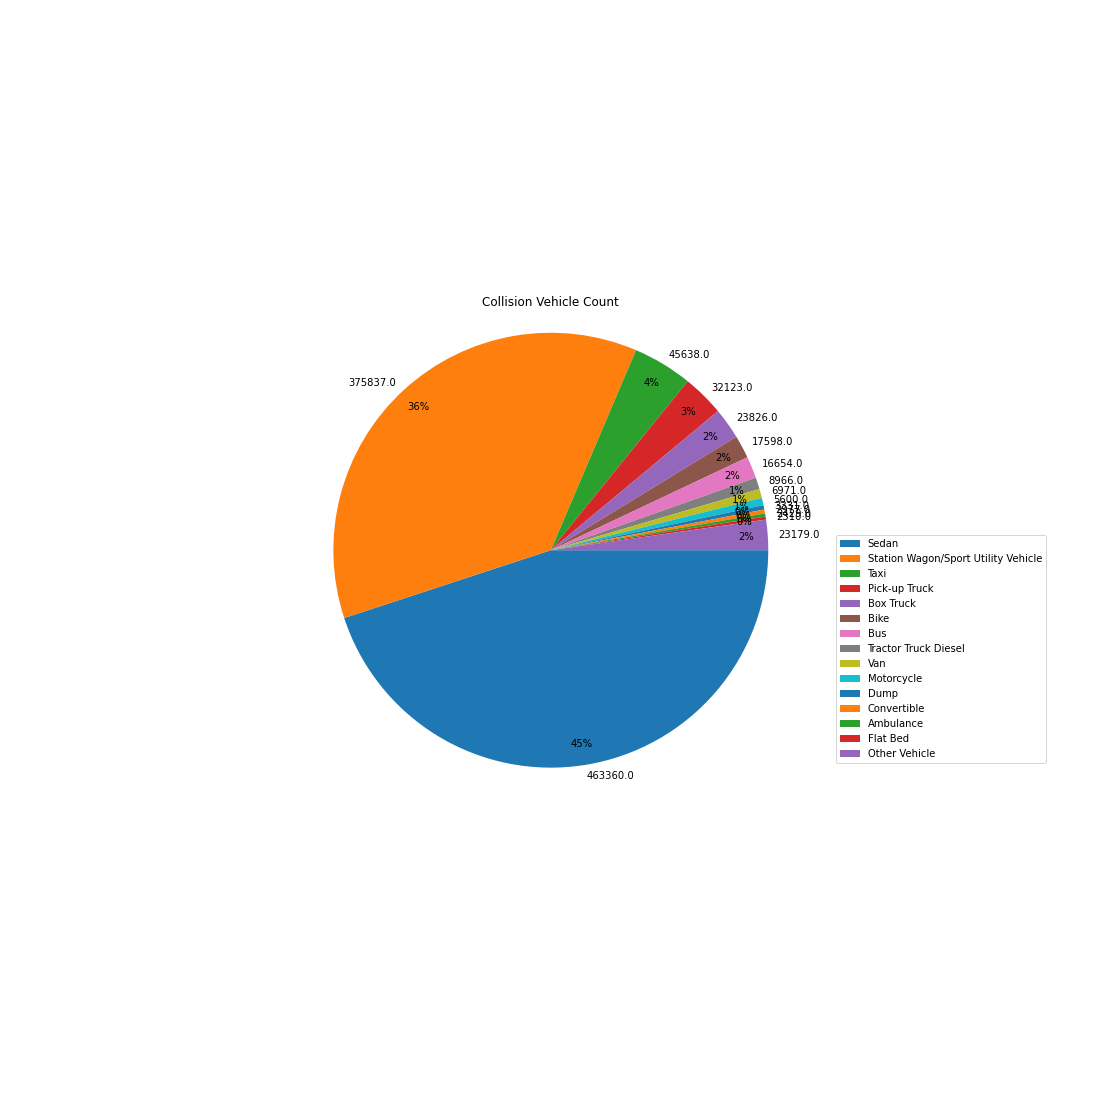

In [46]:
plt.pie(new_vehicle_table.total_vehicle_count,radius = 0.5,counterclock=False,autopct='%1.0f%%',pctdistance=0.9, labels=new_vehicle_table.total_vehicle_count,labeldistance=1.05)
plt.title('Collision Vehicle Count',y=0.72)
plt.legend(new_vehicle_table.index,loc = 'lower right', bbox_to_anchor=(0.96,0.3))
plt.show()

In [47]:
vehicle_table[vehicle_table.total_vehicle_count<2000]['total_vehicle_count'].head(10)

Garbage or Refuse         1899.0
PK                        1686.0
Carry All                 1442.0
Tractor Truck Gasoline    1273.0
E-Scooter                 1145.0
Tow Truck / Wrecker       1070.0
E-Bike                     953.0
Chassis Cab                745.0
Moped                      734.0
Tanker                     733.0
Name: total_vehicle_count, dtype: float64

### Vehicle In Different Time

In [48]:
Few_vehivel_classed = df1_2018_2020[df1_2018_2020.vehicle_type_code1.isin(new_vehicle_table.index[:8])]

In [49]:
Few_vehivel_classed = Few_vehivel_classed[['Hour','vehicle_type_code1']]

In [50]:
Hour_vehicle = Few_vehivel_classed.groupby(by=['Hour','vehicle_type_code1']).agg({'vehicle_type_code1':'count'})

In [51]:
Hour_vehicle['vehicle_type_percent'] = 0.000
for i in range(24):
    Hour_vehicle.loc[i]['vehicle_type_percent'] = list(Hour_vehicle.loc[i]['vehicle_type_code1']/sum(Hour_vehicle.loc[i]['vehicle_type_code1']))

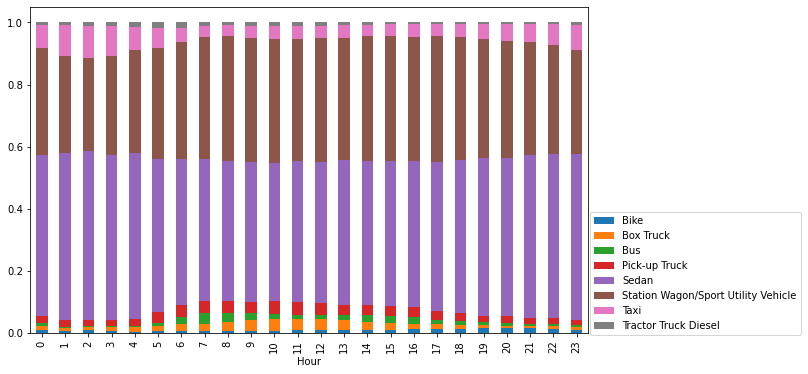

In [52]:
plt.rcParams["figure.figsize"] = (10,6)
Hour_vehicle['vehicle_type_percent'].unstack().plot(kind='bar', stacked=True)
plt.legend(loc='lower right', bbox_to_anchor=(1.39, -0.02))

### Main Reason In Different Time

In [53]:
Reasons_only = df1_2018_2020[['Hour','contributing_factor_vehicle_1']]

In [54]:
most_reasons = ['Driver Inattention/Distraction','Following Too Closely','Failure to Yield Right-of-Way','Backing Unsafely','Passing or Lane Usage Improper','Passing Too Closely','Unsafe Lane Changing','Other Vehicular','Turning Improperly','Traffic Control Disregarded','Unsafe Speed','Reaction to Uninvolved Vehicle','Driver Inexperience','Alcohol Involvement']
Reasons_only.loc[~Reasons_only['contributing_factor_vehicle_1'].isin(most_reasons)]= 'Others'

In [55]:
Hour_Reasons = Reasons_only.groupby(by=['Hour','contributing_factor_vehicle_1']).agg({'contributing_factor_vehicle_1':'count'})

In [56]:
Hour_Reasons['reasons_percent'] = 0.000
for i in range(24):
    Hour_Reasons.loc[i]['reasons_percent'] = list(Hour_Reasons.loc[i]['contributing_factor_vehicle_1']/sum(Hour_Reasons.loc[i]['contributing_factor_vehicle_1']))

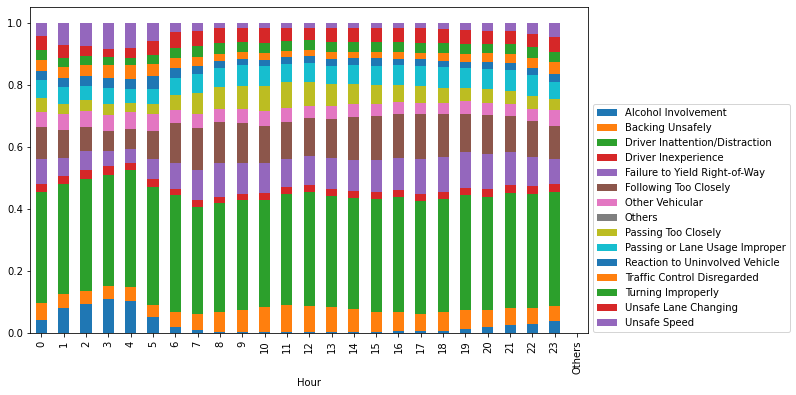

In [57]:
plt.rcParams["figure.figsize"] = (10,6)
Hour_Reasons['reasons_percent'].unstack().plot(kind='bar', stacked=True)
plt.legend(loc='lower right', bbox_to_anchor=(1.37, -0.01))

### Geo Distribution(collision number)

<AxesSubplot:>

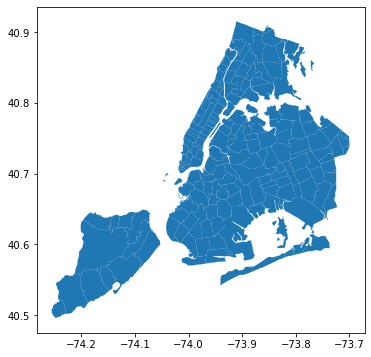

In [58]:
NYCzip=gpd.read_file("NY.geojson")
NYCzip.plot()

In [59]:
df_drop_empty_zipcode_2018_2020.columns

Index(['crash_date', 'crash_time', 'on_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough',
       'zip_code', 'latitude', 'longitude', 'location', 'cross_street_name',
       'off_street_name', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'vehicle_type_code_3',
       'vehicle_type_code_4', 'contributing_factor_vehicle_5',
       'vehicle_type_code_5', 'Date', 'Month', 'Year', 'DOW', 'Hour', 'day'],
      dtype='object')

In [60]:
Zipcode_distribution = df_drop_empty_zipcode_2018_2020.groupby(['zip_code']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()

In [61]:
CollisionGeo = Zipcode_distribution.merge(NYCzip,left_on='zip_code',right_on='zipcode')

In [62]:
CollisionGeo=CollisionGeo.loc[(CollisionGeo.zipcode>=10000)&(CollisionGeo.zipcode<11500)]
CollisionGeo.drop_duplicates(subset=['zipcode'],inplace=True)
CollisionGeo = gpd.GeoDataFrame(CollisionGeo,geometry = CollisionGeo['geometry'])

In [63]:
CollisionGeo['persons_injured_or_killed'] = CollisionGeo['number_of_persons_injured'] + CollisionGeo['number_of_persons_killed']
CollisionGeo['injured_or_killed_rate'] = CollisionGeo['persons_injured_or_killed'] / CollisionGeo['collision_count']
CollisionGeo['killed_rate'] = CollisionGeo['number_of_persons_killed'] / CollisionGeo['collision_count']
#CollisionGeo.set_index('day',inplace = True)

In [64]:
CollisionGeo.columns

Index(['zip_code', 'collision_count', 'number_of_persons_injured',
       'number_of_persons_killed', 'zipcode', 'geometry',
       'persons_injured_or_killed', 'injured_or_killed_rate', 'killed_rate'],
      dtype='object')

[Text(0.5, 1.0, 'killed_rate')]

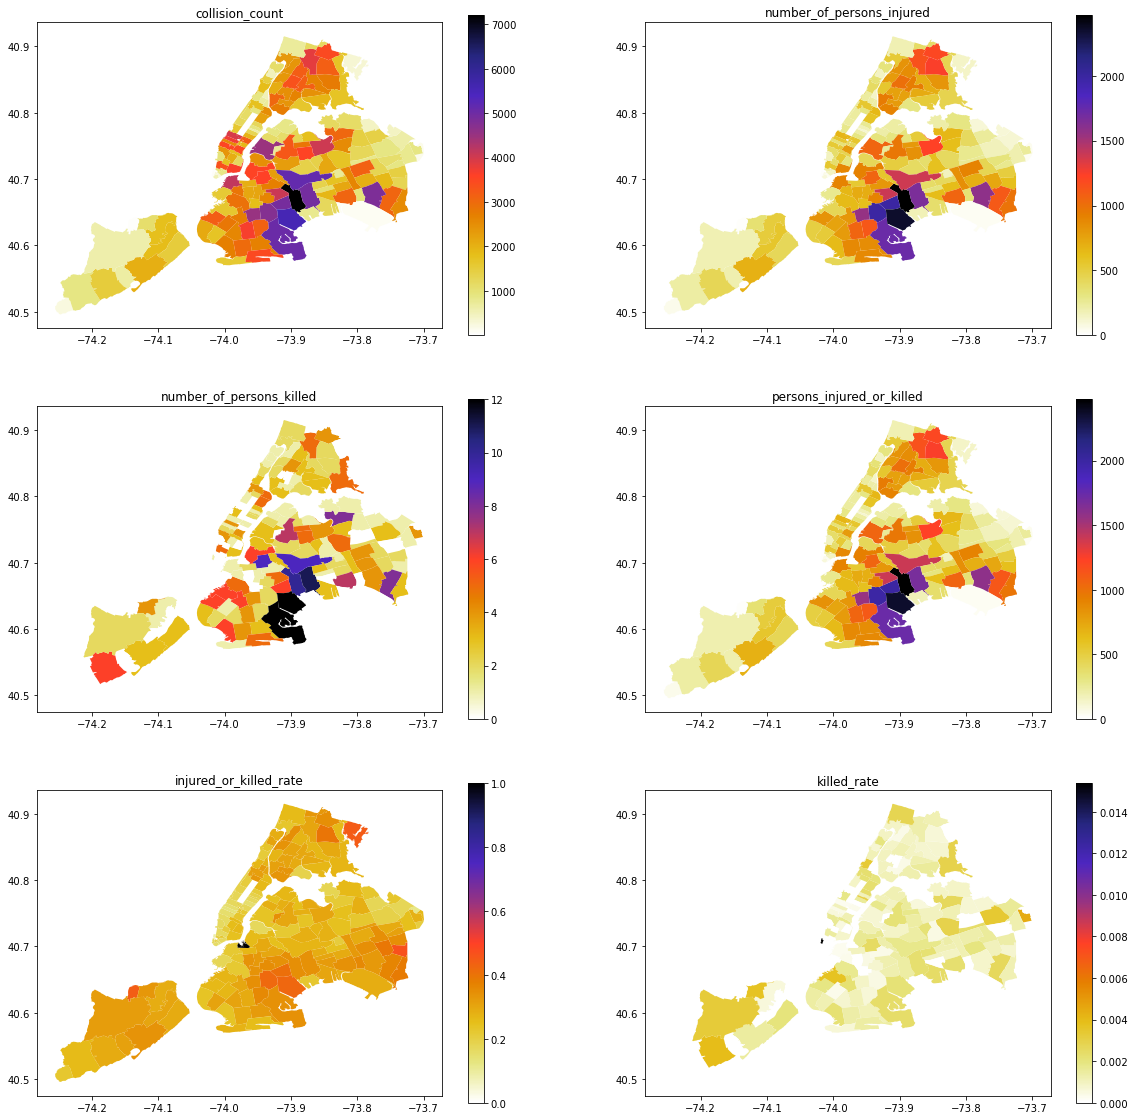

In [65]:
plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots(3, 2)

CollisionGeo.plot(ax = ax[0,0], column='collision_count',cmap='CMRmap_r', legend=True,k=10);ax[0,0].set(title='collision_count')
CollisionGeo.plot(ax = ax[0,1], column='number_of_persons_injured',cmap='CMRmap_r', legend=True,k=10);ax[0,1].set(title='number_of_persons_injured')
CollisionGeo.plot(ax = ax[1,0], column='number_of_persons_killed',cmap='CMRmap_r', legend=True,k=10);ax[1,0].set(title='number_of_persons_killed')
CollisionGeo.plot(ax = ax[1,1], column='persons_injured_or_killed',cmap='CMRmap_r', legend=True,k=10);ax[1,1].set(title='persons_injured_or_killed')
CollisionGeo.plot(ax = ax[2,0], column='injured_or_killed_rate',cmap='CMRmap_r', legend=True,k=10);ax[2,0].set(title='injured_or_killed_rate')
CollisionGeo.plot(ax = ax[2,1], column='killed_rate',cmap='CMRmap_r', legend=True,k=10);ax[2,1].set(title='killed_rate')